In [75]:
import pandas as pd
from IPython.display import display, HTML
import urllib2
import json
import jsonpickle

def read_data():
    movie_data=[]
    data_file = open("movie_data.json", "r")
    for line in data_file:
        try:
            mdata = json.loads(line)        
            movie_data.append(mdata)
        except:
            continue
    print "Total Tweet Count : "+str(len(movie_data) )
    return movie_data


movie_data = read_data()
movie_lens_id,title,budget,collect,company,revenue,runtime,lang,release_date,director= [],[],[],[],[],[],[],[],[],[]
popularity,votecount = [],[]
unknown_movie=[]
invalid_record = [] 
import time

count = 1
for info in movie_data:
    #if info["id"] == 105157:
    print "process Record number --> "+str(count)
    TEMP = []
    
    #1 TITLE
    try:
        if len(info["title"]) > 0:
            #title.append(str(info["title"]))
            TEMP.append(str(info["title"]))
        else:
            TEMP.append("NA")            
    except:
        unknown_movie.append(info["id"])
        count=count+1
        continue


    #2 BUDGET
    if "budget" in info.keys():
        TEMP.append(info["budget"])
    else:
        TEMP.append("NA")

    #3 Collection
    if "belongs_to_collection" in info.keys():
        try:
            col = info["belongs_to_collection"]["name"]
        except:
            col = "NA"
    else:
        col = "NA"
    TEMP.append(str(col.encode('utf-8')))

    #4 Revenue
    if "revenue" in info.keys():
        try:
            rev = info["revenue"]
        except:
            rev = "NA"
    else:
        rev = "NA"
    TEMP.append(str(rev))

    #5 RUNTIME
    if "runtime" in info.keys():
        try:
            rt = info["runtime"]
        except:
            rt = "NA"
    else:
        rt = "NA"
    TEMP.append(str(rt))


    #6 RELEASE DATE
    if "release_date" in info.keys():
        try:
            rd = info["release_date"]
        except:
            rd = "NA"
    else:
        rd = "NA"
    TEMP.append(str(rd))    

    #7 DIRECTOR
    bfound = False
    try:
        if "crew" in info.keys():
            for item in info["crew"]:
                if item["job"] == "Director":
                    bfound = True
                    if item["name"]:
                        TEMP.append(item["name"])
                    else:
                        TEMP.append("NA")
                    break;
            if not bfound:
                TEMP.append("NA")  
    except:
        TEMP.append("NA")     
        
    #8 Vote count
    if "vote_count" in info.keys():
        try:
            vc = info["vote_count"]
        except:
            vc = "NA"
    else:
        vc = "NA"
    TEMP.append(str(vc)) 
    
    #9 Popularity
    if "popularity" in info.keys():
        try:
            pop = info["popularity"]
        except:
            pop = "NA"
    else:
        pop = "NA"
    TEMP.append(str(pop)) 
    #print TEMP
    print "Validate all record"
    if len(TEMP) == 9:
        title.append(TEMP[0])
        budget.append(TEMP[1])
        collect.append(TEMP[2])
        revenue.append(TEMP[3])
        runtime.append(TEMP[4])
        release_date.append(TEMP[5])
        director.append(TEMP[6])
        votecount.append(TEMP[7])
        popularity.append(TEMP[8])
        movie_lens_id.append(info["id"])
    else:
        invalid_record.append(info["id"])

    count=count+1
print invalid_record
print "Total sucessful records : "+str(len(title))
print "Errored movie lens ID : "+str(len(unknown_movie))
print "Invalid Record  : "+str(len(invalid_record))
ext_movie_dataset = pd.DataFrame()
ext_movie_dataset["lens_ID"] = movie_lens_id
ext_movie_dataset["Title"] = title
ext_movie_dataset["Director"] = director
ext_movie_dataset["Budget"] = list(map(long, budget))
ext_movie_dataset["Revenu"] = list(map(long, revenue))
ext_movie_dataset["release_date"] = release_date
ext_movie_dataset["RunTime"] = runtime
ext_movie_dataset["Sequel"] = collect
ext_movie_dataset["popularity"] = list(map(float, popularity))
ext_movie_dataset["Vote_Count"] = list(map(int, votecount))
display(ext_movie_dataset)



Total Tweet Count : 33839
process Record number --> 1
Validate all record
process Record number --> 2
Validate all record
process Record number --> 3
Validate all record
process Record number --> 4
Validate all record
process Record number --> 5
Validate all record
process Record number --> 6
Validate all record
process Record number --> 7
Validate all record
process Record number --> 8
Validate all record
process Record number --> 9
Validate all record
process Record number --> 10
Validate all record
process Record number --> 11
Validate all record
process Record number --> 12
Validate all record
process Record number --> 13
Validate all record
process Record number --> 14
Validate all record
process Record number --> 15
Validate all record
process Record number --> 16
Validate all record
process Record number --> 17
Validate all record
process Record number --> 18
Validate all record
process Record number --> 19
Validate all record
process Record number --> 20
Validate all record
pro

,lens_ID,Title,Director,Budget,Revenu,release_date,RunTime,Sequel,popularity,Vote_Count
0,862,Toy Story,John Lasseter,30000000,361958736,1995-10-30,81,Toy Story Collection,3.360919,2577
1,710,GoldenEye,Martin Campbell,58000000,352194034,1995-11-16,130,James Bond Collection,2.202975,585
2,11062,City Hall,Harold Becker,0,0,1996-02-16,111,NA,0.504278,22
3,12241,Curdled,Reb Braddock,2300000,49620,1996-09-06,88,NA,0.519073,6
4,84839,The Comic,Carl Reiner,0,0,1969-11-19,94,NA,0.000153,1
5,97353,Up In Smoke,William Beaudine,0,0,1957-12-22,61,NA,0.000143,0
6,102947,First Daughter,Armand Mastroianni,0,0,1999-08-15,102,NA,0.000342,1
7,98551,The Flaw,David Sington,0,0,2011-01-21,78,NA,0.001775,0
8,59197,Battle of Los Angeles,Mark Atkins,0,0,2011-03-10,91,NA,0.425238,30
9,131220,Jason Becker: Not Dead Yet,Jesse Vile,0,0,2012-03-03,87,NA,0.002082,3


In [76]:
dt = ext_movie_dataset.query("Budget > 0").sort_values(by='release_date',ascending=False)
dt1 = dt.query("Revenu != '0'").sort_values(by='release_date',ascending=False)
dt2 = dt1.query("Vote_Count > 1000").sort_values(by='release_date',ascending=False)
dt3 = dt2.query("Director > 0").sort_values(by='release_date',ascending=False)
dt3

,lens_ID,Title,Director,Budget,Revenu,release_date,RunTime,Sequel,popularity,Vote_Count
7244,273248,The Hateful Eight,Quentin Tarantino,62000000,0,2015-12-25,182,NA,9.874219,1057
10389,281957,The Revenant,Alejandro González Iñárritu,135000000,167228692,2015-12-25,156,NA,14.991297,1533
6020,140607,Star Wars: The Force Awakens,J.J. Abrams,200000000,1893950346,2015-12-15,136,Star Wars Collection,14.373451,3135
9146,131634,The Hunger Games: Mockingjay - Part 2,Francis Lawrence,160000000,639827109,2015-11-18,136,The Hunger Games Collection,7.422395,1064
9480,206647,Spectre,Sam Mendes,245000000,879437662,2015-10-26,148,James Bond Collection,22.235638,2090
8844,286217,The Martian,Ridley Scott,108000000,595380321,2015-09-30,141,NA,25.343780,2634
4796,294254,Maze Runner: The Scorch Trials,Wes Ball,61000000,311256926,2015-09-09,132,The Maze Runner Collection,9.009266,1149
10035,203801,The Man from U.N.C.L.E.,Guy Ritchie,75000000,108145109,2015-08-13,116,NA,5.521889,1002
6024,166424,Fantastic Four,Josh Trank,120000001,167977596,2015-08-05,100,The Fantastic Four Collection,4.594282,1099
9148,257344,Pixels,Chris Columbus,88000000,243637091,2015-07-16,105,NA,10.274502,1009


In [ ]:
#####################################################################
'''Final Dataset has 406 records of Movie lists with Directors Info.'''
#####################################################################

In [124]:
hh = dt3[["Title","Director","Budget","Revenu","popularity","Vote_Count"]].sort_values(by='Vote_Count',ascending=False)
hh1=hh[:10]
print "MOST POPULAR MOVIES INFO"
hh1

MOST POPULAR MOVIES INFO


,Title,Director,Budget,Revenu,popularity,Vote_Count
27579,Inception,Christopher Nolan,160000000,825500000,5.175583,8086
30700,The Avengers,Joss Whedon,220000000,1518594910,7.410047,7927
26250,Avatar,James Cameron,237000000,2781505847,4.860117,7369
22664,The Dark Knight,Christopher Nolan,185000000,1001921825,5.511830,6717
33014,Django Unchained,Quentin Tarantino,100000000,425368238,4.349623,6263
31182,The Hunger Games,Gary Ross,75000000,691210692,1.995660,6211
556,Iron Man 3,Shane Black,200000000,1215439994,4.229431,6199
31189,The Dark Knight Rises,Christopher Nolan,250000000,1081041287,4.453101,5906
32934,The Hobbit: An Unexpected Journey,Peter Jackson,250000000,1017003568,4.331901,5789
32217,Skyfall,Sam Mendes,200000000,1108561013,5.152624,5363


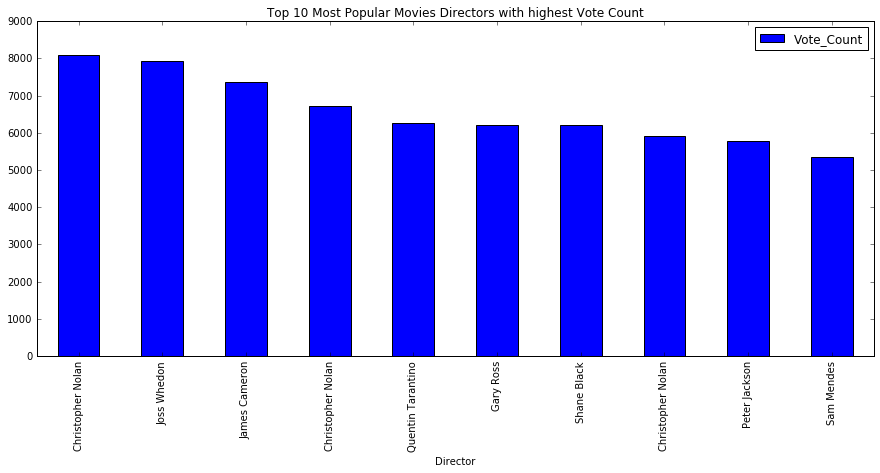

In [172]:
# Top 10 Most Popular Movies Director with highest Vote Count
dd = hh1[["Director","Vote_Count","Title"]]
dd1=dd.set_index("Director")
%matplotlib inline
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
dd1.plot(kind="bar",title = "Top 10 Most Popular Movies Directors with highest Vote Count")

In [175]:
bb = hh1[["Director","Budget","Revenu","Title"]]
bb["Profit_Loss"] = bb["Revenu"] - bb["Budget"]
cc = bb.sort_values(by=["Profit_Loss"],ascending=False)
cc1 = cc.set_index("Director")
cc1

C:\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Budget,Revenu,Title,Profit_Loss
Director,,,,
James Cameron,237000000,2781505847,Avatar,2544505847
Joss Whedon,220000000,1518594910,The Avengers,1298594910
Shane Black,200000000,1215439994,Iron Man 3,1015439994
Sam Mendes,200000000,1108561013,Skyfall,908561013
Christopher Nolan,250000000,1081041287,The Dark Knight Rises,831041287
Christopher Nolan,185000000,1001921825,The Dark Knight,816921825
Peter Jackson,250000000,1017003568,The Hobbit: An Unexpected Journey,767003568
Christopher Nolan,160000000,825500000,Inception,665500000
Gary Ross,75000000,691210692,The Hunger Games,616210692


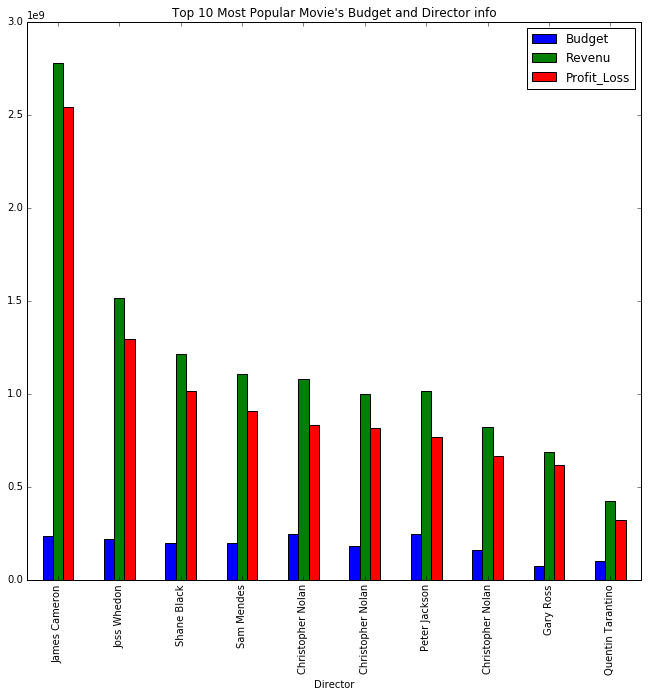

In [174]:
# Top 10 Most Popular Movie's Budget and Director info
dd = hh1[["Director","Vote_Count","Title"]]
dd1=dd.set_index("Director")
%matplotlib inline
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11 #w
fig_size[1] = 10#H
plt.rcParams["figure.figsize"] = fig_size
cc1.plot(kind="bar",title="Top 10 Most Popular Movie's Budget and Director info")

In [ ]:
# Top Budget/Revenu Directors (["Christopher Nolan","Joss Whedon","James Cameron","Quentin Tarantino","Gary Ross","Shane Black",
                       #     "Peter Jackson","Sam Mendes"])]

In [191]:
#Get Top 10 movies with highest Revenu
hh = dt3[["Title","Director","Budget","Revenu","Vote_Count"]].sort_values(by="Revenu",ascending=False)[:10]
C=hh.pivot_table('Revenu',index='Title',columns=['Director'],aggfunc='mean')


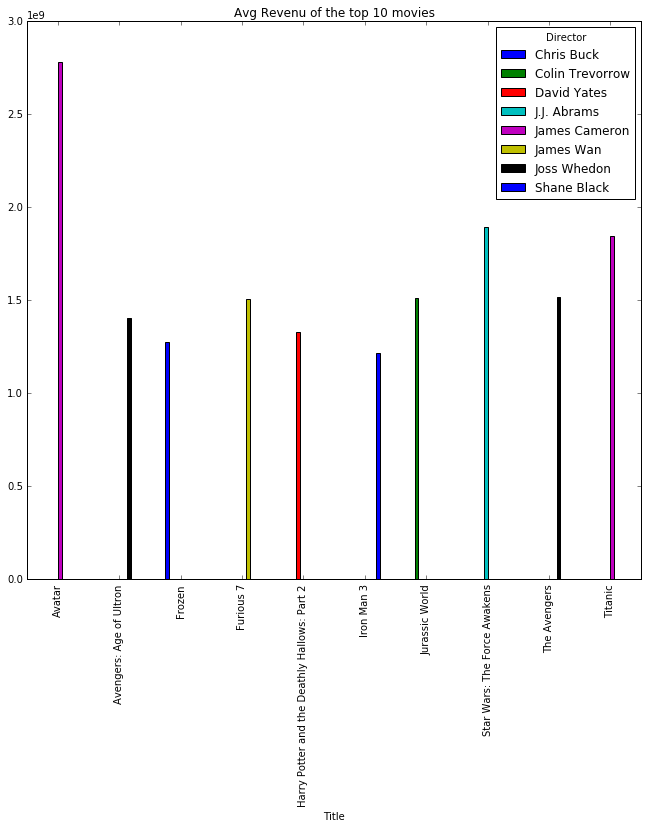

In [177]:
C.plot(kind="bar",title="Avg Revenu of the top 10 movies")

In [180]:
qq = dt3[["Title","Director","Budget","Revenu","popularity","Vote_Count"]].sort_values(by='Vote_Count',ascending=False)
qq1 = qq.groupby(["Director"]).Director.count().order(ascending=False)[:10]
print "Top 10 Directors, With movie Counts"
qq1


Top 10 Directors, With movie Counts


C:\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Director
Steven Spielberg     12
Christopher Nolan     7
Quentin Tarantino     7
Peter Jackson         6
Ridley Scott          6
Robert Zemeckis       6
David Fincher         6
Guy Ritchie           5
Gore Verbinski        5
J.J. Abrams           5
Name: Director, dtype: int64

In [182]:
#Attempt to Determine which Director makes most profitable Movies among above 5 Dir's
T = dt3[['Director','Title','Budget','Revenu']]
T["profit%"] = (T["Revenu"] - T["Budget"])/T["Revenu"] *100
T1 = T.set_index("Title")


C:\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


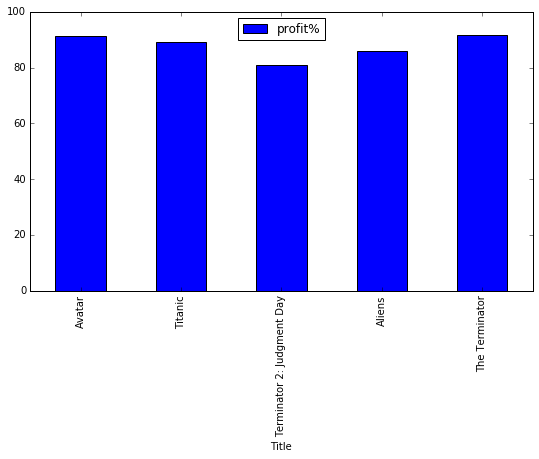

In [190]:
CN = T1[["Director","profit%"]].query("Director == 'James Cameron'")
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9 #w
fig_size[1] = 5 #H
plt.rcParams["figure.figsize"] = fig_size
CN.plot(kind="bar")

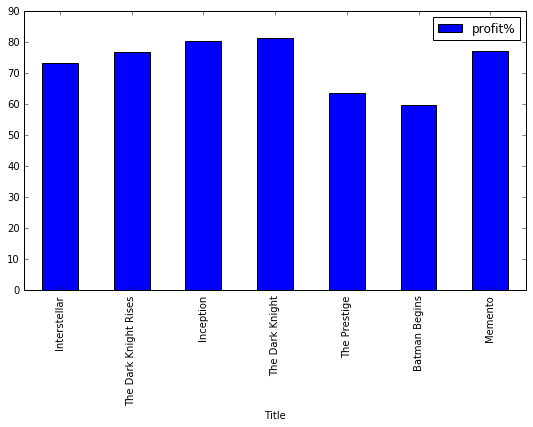

In [187]:
#Just to compare with the next top Director..!!! 

CN = T1[["Director","profit%"]].query("Director == 'Christopher Nolan'")
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9 #w
fig_size[1] = 5 #H
plt.rcParams["figure.figsize"] = fig_size
CN.plot(kind="bar")

In [ ]:
'''  ***** CONCLUSION ***** '''

# In the given datset "James Cameron" has made the highest profit movie. 
# The top two highest profit movies were directed by "James Cameron".
# Looking at the profit stats of the movies made by "james Cameron" - the profit margin is atleast ~80%.
# This clearly indicates Based on the given dataset "James Cameron" is most profitable director  for movie producers.